<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/Models_EVALS_75%25/Cancer_75.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [2]:
!pip install tensorflow==2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454.3 MB 11 kB/s 
     |████████████████████████████████| 462 kB 65.8 MB/s 
     |████████████████████████████████| 14.8 MB 46.3 MB/s 
     |████████████████████████████████| 132 kB 63.6 MB/s 
     |████████████████████████████████| 1.2 MB 59.7 MB/s 
     |████████████████████████████████| 4.0 MB 40.0 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68725 sha256=6af68c4c943cd32fd0d7ff08af4683199923842a47c84c80b89df6b993fb6cf2
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: n

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,precision_score

In [2]:
df = pd.read_csv("/content/cancer.csv")
df_new = df.drop(['id','Unnamed: 32'],axis =1)
df_new['diagnosis'] = LabelEncoder().fit_transform(df_new['diagnosis'])
y = df_new['diagnosis']

In [3]:
rank1 = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "Chi_2").set_index('Attributes_Names')
df_chi = df_new[rank1[:23].index]
X_col =  df_chi
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 23)
Shape of testing data (114, 23)


In [4]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.956140350877193
Recall:  0.9574468085106383
Precision:  0.9375
[[64  3]
 [ 2 45]]


In [5]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9912280701754386
Recall:  0.9787234042553191
Precision:  1.0
[[64  3]
 [ 2 45]]


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 23)                552       
_________________________________________________________________
batch_normalization (BatchNo (None, 23)                92        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                480       
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 24)                9

In [7]:
h = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
15/15 [==============================] - 4s 48ms/step - loss: 0.8074 - accuracy: 0.5451 - val_loss: 0.6252 - val_accuracy: 0.6491
Epoch 2/100
15/15 [==============================] - 0s 10ms/step - loss: 0.7088 - accuracy: 0.6132 - val_loss: 0.5771 - val_accuracy: 0.6842
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 0.6211 - accuracy: 0.6725 - val_loss: 0.5304 - val_accuracy: 0.7456
Epoch 4/100
15/15 [==============================] - 0s 10ms/step - loss: 0.5058 - accuracy: 0.7604 - val_loss: 0.4881 - val_accuracy: 0.7895
Epoch 5/100
15/15 [==============================] - 0s 11ms/step - loss: 0.4782 - accuracy: 0.7736 - val_loss: 0.4403 - val_accuracy: 0.8333
Epoch 6/100
15/15 [==============================] - 0s 14ms/step - loss: 0.4140 - accuracy: 0.8088 - val_loss: 0.3884 - val_accuracy: 0.8421
Epoch 7/100
15/15 [==============================] - 0s 13ms/step - loss: 0.4264 - accuracy: 0.8374 - val_loss: 0.3385 - val_accuracy: 0.9298
Epoch 8

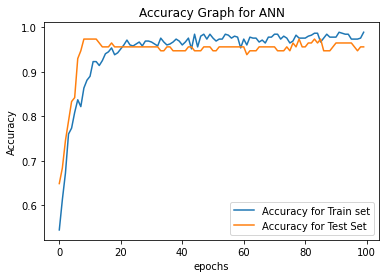

In [8]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

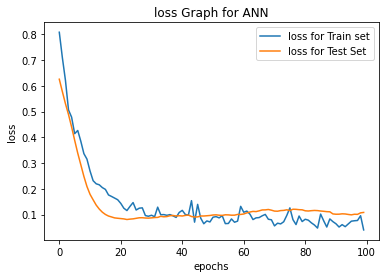

In [9]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [10]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.956140350877193
Recall:  0.9361702127659575
Precision:  0.9565217391304348
[[65  2]
 [ 3 44]]


In [11]:
rank2  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "Tree_based_method").set_index('Attributes_Names')
df_tree = df_new[rank2[0:23].index]
X_col =  df_tree
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 23)
Shape of testing data (114, 23)


In [12]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9736842105263158
Recall:  0.9787234042553191
Precision:  0.9583333333333334
[[65  2]
 [ 1 46]]


In [13]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9824561403508771
Recall:  0.9574468085106383
Precision:  1.0
[[67  0]
 [ 2 45]]


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 23)                552       
_________________________________________________________________
batch_normalization_3 (Batch (None, 23)                92        
_________________________________________________________________
dense_6 (Dense)              (None, 20)                480       
_________________________________________________________________
batch_normalization_4 (Batch (None, 20)                80        
_________________________________________________________________
dense_7 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 24)               

In [15]:
h = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
15/15 [==============================] - 3s 35ms/step - loss: 0.6854 - accuracy: 0.5824 - val_loss: 0.6450 - val_accuracy: 0.7368
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 0.6322 - accuracy: 0.6110 - val_loss: 0.5991 - val_accuracy: 0.7982
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 0.5702 - accuracy: 0.7231 - val_loss: 0.5453 - val_accuracy: 0.8246
Epoch 4/100
15/15 [==============================] - 0s 8ms/step - loss: 0.5073 - accuracy: 0.7495 - val_loss: 0.4941 - val_accuracy: 0.8509
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 0.4717 - accuracy: 0.7670 - val_loss: 0.4366 - val_accuracy: 0.8772
Epoch 6/100
15/15 [==============================] - 0s 10ms/step - loss: 0.4198 - accuracy: 0.8022 - val_loss: 0.3860 - val_accuracy: 0.8772
Epoch 7/100
15/15 [==============================] - 0s 10ms/step - loss: 0.3561 - accuracy: 0.8681 - val_loss: 0.3402 - val_accuracy: 0.8860
Epoch 8/10

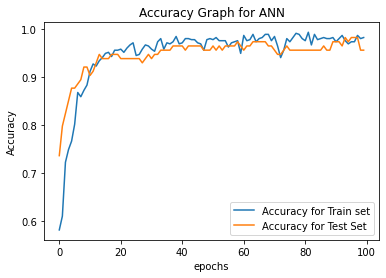

In [16]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

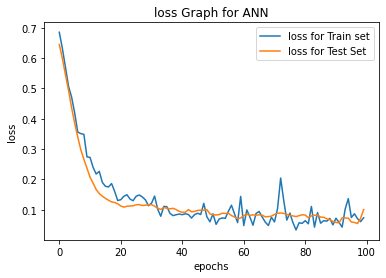

In [17]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [18]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.956140350877193
Recall:  0.9574468085106383
Precision:  0.9375
[[64  3]
 [ 2 45]]


In [19]:
rank3  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "permutation_method_mean").set_index('Attributes_Names')
df_per_mean = df_new[rank3[0:23].index]
X_col =  df_per_mean
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 23)
Shape of testing data (114, 23)


In [20]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9385964912280702
Recall:  0.9574468085106383
Precision:  0.9
[[62  5]
 [ 2 45]]


In [21]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9736842105263158
Recall:  0.9574468085106383
Precision:  0.9782608695652174
[[66  1]
 [ 2 45]]


In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 23)                552       
_________________________________________________________________
batch_normalization_6 (Batch (None, 23)                92        
_________________________________________________________________
dense_11 (Dense)             (None, 20)                480       
_________________________________________________________________
batch_normalization_7 (Batch (None, 20)                80        
_________________________________________________________________
dense_12 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24)                0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 24)               

In [23]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 3s 28ms/step - loss: 0.7379 - accuracy: 0.5868 - val_loss: 0.6251 - val_accuracy: 0.6754
Epoch 2/50
15/15 [==============================] - 0s 5ms/step - loss: 0.6656 - accuracy: 0.6396 - val_loss: 0.5676 - val_accuracy: 0.8509
Epoch 3/50
15/15 [==============================] - 0s 7ms/step - loss: 0.6175 - accuracy: 0.6637 - val_loss: 0.5221 - val_accuracy: 0.8246
Epoch 4/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5105 - accuracy: 0.7648 - val_loss: 0.4809 - val_accuracy: 0.8421
Epoch 5/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4955 - accuracy: 0.7604 - val_loss: 0.4416 - val_accuracy: 0.8596
Epoch 6/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4831 - accuracy: 0.7868 - val_loss: 0.3990 - val_accuracy: 0.8772
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.4119 - accuracy: 0.8044 - val_loss: 0.3641 - val_accuracy: 0.8860
Epoch 8/50
15/15 [=

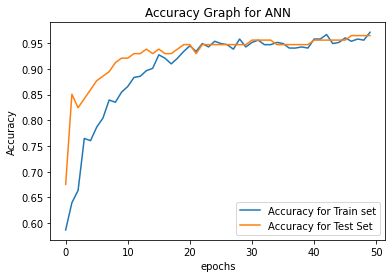

In [24]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

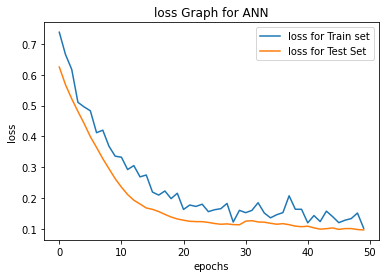

In [25]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [26]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9649122807017544
Recall:  0.9361702127659575
Precision:  0.9777777777777777
[[66  1]
 [ 3 44]]


In [27]:
rank4  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "permutation_method_std").set_index('Attributes_Names')
df_per_std  = df_new[rank4[0:23].index]
X_col =  df_per_std
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 23)
Shape of testing data (114, 23)


In [29]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9824561403508771
Recall:  0.9787234042553191
Precision:  0.9787234042553191
[[66  1]
 [ 1 46]]


In [30]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9736842105263158
Recall:  0.9361702127659575
Precision:  1.0
[[67  0]
 [ 3 44]]


In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 23)                552       
_________________________________________________________________
batch_normalization_9 (Batch (None, 23)                92        
_________________________________________________________________
dense_16 (Dense)             (None, 20)                480       
_________________________________________________________________
batch_normalization_10 (Batc (None, 20)                80        
_________________________________________________________________
dense_17 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_6 (Dropout)          (None, 24)                0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 24)               

In [32]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 2s 20ms/step - loss: 0.7686 - accuracy: 0.5341 - val_loss: 0.6726 - val_accuracy: 0.5965
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 0.6369 - accuracy: 0.6396 - val_loss: 0.6467 - val_accuracy: 0.6579
Epoch 3/50
15/15 [==============================] - 0s 5ms/step - loss: 0.6592 - accuracy: 0.6352 - val_loss: 0.6191 - val_accuracy: 0.7281
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5801 - accuracy: 0.6857 - val_loss: 0.5835 - val_accuracy: 0.7719
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.5304 - accuracy: 0.7495 - val_loss: 0.5434 - val_accuracy: 0.8246
Epoch 6/50
15/15 [==============================] - 0s 5ms/step - loss: 0.5290 - accuracy: 0.7429 - val_loss: 0.5024 - val_accuracy: 0.8509
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4536 - accuracy: 0.8022 - val_loss: 0.4544 - val_accuracy: 0.8596
Epoch 8/50
15/15 [=

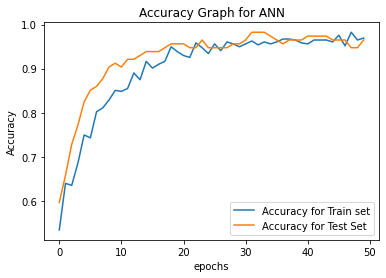

In [33]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

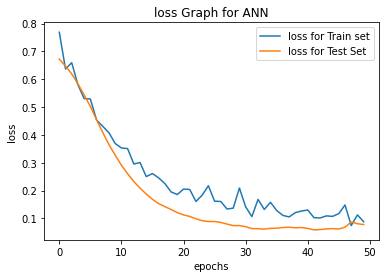

In [34]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [35]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9649122807017544
Recall:  0.9574468085106383
Precision:  0.9574468085106383
[[65  2]
 [ 2 45]]


In [36]:
rank5  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "PCA").set_index('Attributes_Names')
df_pca  = df_new[rank5[:23].index]
X_col =  df_pca
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 23)
Shape of testing data (114, 23)


In [37]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9824561403508771
Recall:  0.9787234042553191
Precision:  0.9787234042553191
[[66  1]
 [ 1 46]]


In [38]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9824561403508771
Recall:  0.9574468085106383
Precision:  1.0
[[67  0]
 [ 2 45]]


In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 23)                552       
_________________________________________________________________
batch_normalization_12 (Batc (None, 23)                92        
_________________________________________________________________
dense_21 (Dense)             (None, 20)                480       
_________________________________________________________________
batch_normalization_13 (Batc (None, 20)                80        
_________________________________________________________________
dense_22 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_8 (Dropout)          (None, 24)                0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 24)               

In [40]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 3s 35ms/step - loss: 0.8313 - accuracy: 0.5099 - val_loss: 0.6572 - val_accuracy: 0.7544
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.7044 - accuracy: 0.5868 - val_loss: 0.6136 - val_accuracy: 0.8509
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.6042 - accuracy: 0.6857 - val_loss: 0.5731 - val_accuracy: 0.8421
Epoch 4/50
15/15 [==============================] - 0s 13ms/step - loss: 0.5919 - accuracy: 0.7099 - val_loss: 0.5366 - val_accuracy: 0.8596
Epoch 5/50
15/15 [==============================] - 0s 12ms/step - loss: 0.5049 - accuracy: 0.7495 - val_loss: 0.4894 - val_accuracy: 0.8772
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 0.4448 - accuracy: 0.8044 - val_loss: 0.4350 - val_accuracy: 0.8947
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4178 - accuracy: 0.8220 - val_loss: 0.3868 - val_accuracy: 0.8947
Epoch 8/50
15/15

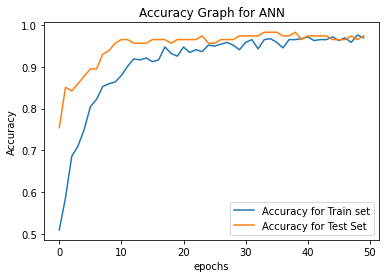

In [41]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

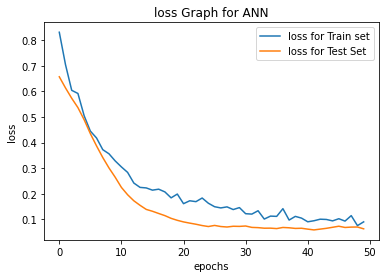

In [42]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [43]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9736842105263158
Recall:  0.9574468085106383
Precision:  0.9782608695652174
[[66  1]
 [ 2 45]]


In [44]:
rank6  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "F_test").set_index('Attributes_Names')
df_f_test  = df_new[rank6[:23].index]
X_col =  df_f_test
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 23)
Shape of testing data (114, 23)


In [45]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.956140350877193
Recall:  0.9787234042553191
Precision:  0.92
[[63  4]
 [ 1 46]]


In [46]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))


Accuracy:  0.9824561403508771
Recall:  0.9574468085106383
Precision:  1.0
[[67  0]
 [ 2 45]]


In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 23)                552       
_________________________________________________________________
batch_normalization_15 (Batc (None, 23)                92        
_________________________________________________________________
dense_26 (Dense)             (None, 20)                480       
_________________________________________________________________
batch_normalization_16 (Batc (None, 20)                80        
_________________________________________________________________
dense_27 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_10 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 24)               

In [48]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 2s 20ms/step - loss: 0.8142 - accuracy: 0.5231 - val_loss: 0.6422 - val_accuracy: 0.7018
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 0.7099 - accuracy: 0.6066 - val_loss: 0.5951 - val_accuracy: 0.7807
Epoch 3/50
15/15 [==============================] - 0s 5ms/step - loss: 0.6545 - accuracy: 0.6264 - val_loss: 0.5551 - val_accuracy: 0.8333
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 0.6211 - accuracy: 0.6527 - val_loss: 0.5113 - val_accuracy: 0.8509
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5380 - accuracy: 0.7538 - val_loss: 0.4622 - val_accuracy: 0.8772
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.4703 - accuracy: 0.7890 - val_loss: 0.4216 - val_accuracy: 0.9035
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: 0.4297 - accuracy: 0.8264 - val_loss: 0.3742 - val_accuracy: 0.9211
Epoch 8/50
15/15 [=

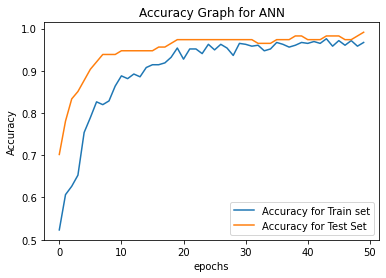

In [49]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

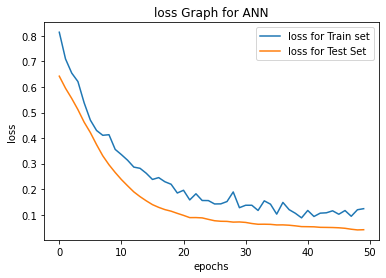

In [50]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [51]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9912280701754386
Recall:  0.9787234042553191
Precision:  1.0
[[67  0]
 [ 1 46]]


In [52]:
rank7  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "mutual_info").set_index('Attributes_Names')
df_mutual = df_new[rank7[:23].index]
X_col =  df_mutual
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 23)
Shape of testing data (114, 23)


In [53]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.9649122807017544
Recall:  0.9787234042553191
Precision:  0.9387755102040817
[[64  3]
 [ 1 46]]


In [54]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9824561403508771
Recall:  0.9574468085106383
Precision:  1.0
[[67  0]
 [ 2 45]]


In [55]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 23)                552       
_________________________________________________________________
batch_normalization_18 (Batc (None, 23)                92        
_________________________________________________________________
dense_31 (Dense)             (None, 20)                480       
_________________________________________________________________
batch_normalization_19 (Batc (None, 20)                80        
_________________________________________________________________
dense_32 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_12 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 24)               

In [56]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 2s 20ms/step - loss: 0.8166 - accuracy: 0.5890 - val_loss: 0.6665 - val_accuracy: 0.5965
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.6484 - accuracy: 0.6286 - val_loss: 0.6203 - val_accuracy: 0.5877
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5942 - accuracy: 0.6747 - val_loss: 0.5752 - val_accuracy: 0.7193
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 0.5263 - accuracy: 0.7121 - val_loss: 0.5315 - val_accuracy: 0.8596
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4726 - accuracy: 0.7868 - val_loss: 0.4945 - val_accuracy: 0.9035
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 0.4387 - accuracy: 0.7714 - val_loss: 0.4567 - val_accuracy: 0.9211
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: 0.3907 - accuracy: 0.8396 - val_loss: 0.4133 - val_accuracy: 0.9211
Epoch 8/50
15/15 [=

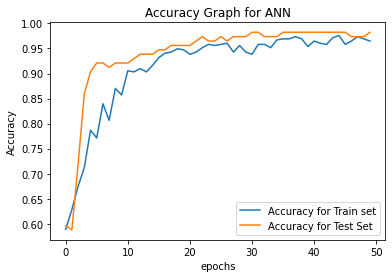

In [57]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

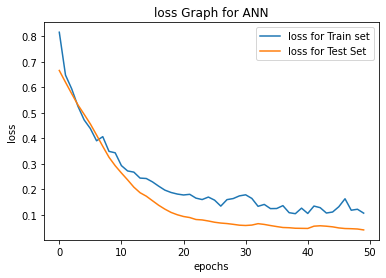

In [58]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [59]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9824561403508771
Recall:  0.9787234042553191
Precision:  0.9787234042553191
[[66  1]
 [ 1 46]]


In [60]:
rank8  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "Pearson_Correlation").set_index('Attributes_Names')
df_pearson =  df_new[rank8[:23].index]
X_col =  df_pearson
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 23)
Shape of testing data (114, 23)


In [61]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("Recall: ", recall_score(y_test,y_pred_rf))
print("Precision: ", precision_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

Accuracy:  0.956140350877193
Recall:  0.9574468085106383
Precision:  0.9375
[[64  3]
 [ 2 45]]


In [62]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_svc))
print("Recall: ", recall_score(y_test,y_pred_svc))
print("Precision: ", precision_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

Accuracy:  0.9824561403508771
Recall:  0.9574468085106383
Precision:  1.0
[[67  0]
 [ 2 45]]


In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 23)                552       
_________________________________________________________________
batch_normalization_21 (Batc (None, 23)                92        
_________________________________________________________________
dense_36 (Dense)             (None, 20)                480       
_________________________________________________________________
batch_normalization_22 (Batc (None, 20)                80        
_________________________________________________________________
dense_37 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_14 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 24)               

In [64]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 3s 33ms/step - loss: 0.7741 - accuracy: 0.6110 - val_loss: 0.6899 - val_accuracy: 0.6228
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.6939 - accuracy: 0.6681 - val_loss: 0.6488 - val_accuracy: 0.8246
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.5960 - accuracy: 0.6901 - val_loss: 0.6029 - val_accuracy: 0.8947
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.5764 - accuracy: 0.7055 - val_loss: 0.5558 - val_accuracy: 0.9123
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.5115 - accuracy: 0.7385 - val_loss: 0.5067 - val_accuracy: 0.9474
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 0.4505 - accuracy: 0.8000 - val_loss: 0.4505 - val_accuracy: 0.9561
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.4042 - accuracy: 0.8176 - val_loss: 0.3926 - val_accuracy: 0.9561
Epoch 8/50
15/15 [

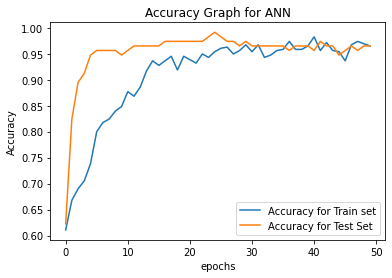

In [65]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

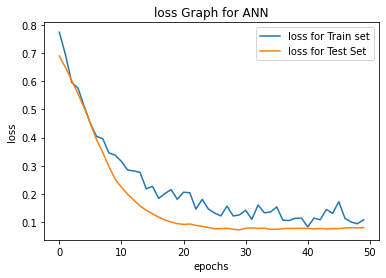

In [66]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [67]:
y_pred_ann = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann))
print("Recall: ", recall_score(y_test,y_pred_ann))
print("Precision: ", precision_score(y_test,y_pred_ann))
print(confusion_matrix(y_test,y_pred_ann))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:  0.9649122807017544
Recall:  0.9574468085106383
Precision:  0.9574468085106383
[[65  2]
 [ 2 45]]


In [68]:
OWA =  rank8  = pd.read_excel("/content/cancer_dataset_U.xlsx",sheet_name = "OWA_method").set_index('Attributes_Name')

In [69]:
df_owa  = df_new[OWA[:23].index]

In [70]:
X_col =  df_owa
y = df_new['diagnosis']
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (455, 23)
Shape of testing data (114, 23)


In [72]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
pred =  rf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,pred))
print("Recall: ", recall_score(y_test,pred))
print("Precision: ", precision_score(y_test,pred))
print(confusion_matrix(y_test,pred))

Accuracy:  0.956140350877193
Recall:  0.9574468085106383
Precision:  0.9375
[[64  3]
 [ 2 45]]


In [73]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred =  svc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy:  0.9824561403508771
Recall:  0.9574468085106383
Precision:  1.0
[[67  0]
 [ 2 45]]


In [74]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu', input_shape=(23,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 23)                552       
_________________________________________________________________
batch_normalization_24 (Batc (None, 23)                92        
_________________________________________________________________
dense_41 (Dense)             (None, 20)                480       
_________________________________________________________________
batch_normalization_25 (Batc (None, 20)                80        
_________________________________________________________________
dense_42 (Dense)             (None, 24)                504       
_________________________________________________________________
dropout_16 (Dropout)         (None, 24)                0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 24)               

In [75]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
15/15 [==============================] - 3s 42ms/step - loss: 0.7335 - accuracy: 0.5780 - val_loss: 0.6292 - val_accuracy: 0.5965
Epoch 2/50
15/15 [==============================] - 0s 21ms/step - loss: 0.6631 - accuracy: 0.6022 - val_loss: 0.6085 - val_accuracy: 0.6316
Epoch 3/50
15/15 [==============================] - 0s 15ms/step - loss: 0.5935 - accuracy: 0.6615 - val_loss: 0.5787 - val_accuracy: 0.6579
Epoch 4/50
15/15 [==============================] - 0s 13ms/step - loss: 0.5819 - accuracy: 0.6879 - val_loss: 0.5434 - val_accuracy: 0.7895
Epoch 5/50
15/15 [==============================] - 0s 16ms/step - loss: 0.5580 - accuracy: 0.7253 - val_loss: 0.5170 - val_accuracy: 0.8333
Epoch 6/50
15/15 [==============================] - 0s 15ms/step - loss: 0.5411 - accuracy: 0.7451 - val_loss: 0.4860 - val_accuracy: 0.9123
Epoch 7/50
15/15 [==============================] - 0s 17ms/step - loss: 0.4951 - accuracy: 0.7604 - val_loss: 0.4567 - val_accuracy: 0.9298
Epoch 8/50
15

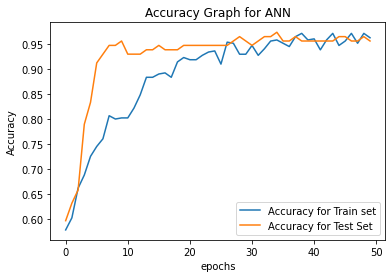

In [76]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

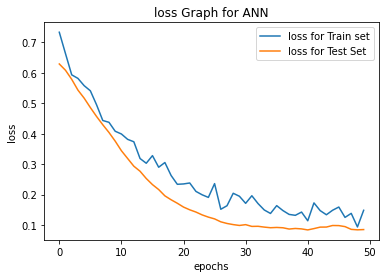

In [77]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [79]:
y_pred_ann_owa = model.predict_classes(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred_ann_owa))
print("Recall: ", recall_score(y_test,y_pred_ann_owa))
print("Precision: ", precision_score(y_test,y_pred_ann_owa))
print(confusion_matrix(y_test,y_pred_ann_owa))

Accuracy:  0.956140350877193
Recall:  0.9574468085106383
Precision:  0.9375
[[64  3]
 [ 2 45]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
